<a href="https://colab.research.google.com/github/suneet-saini/100dayofpython/blob/main/biagram_makemore_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline


In [269]:
words =  open('/content/sample_data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [270]:
len(words)

32033

In [271]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [272]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [273]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [274]:
C = torch.randn((27, 2))

In [275]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-2.1848,  0.4903])

In [276]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [277]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [278]:
torch.cat((emb[:, 0, :], emb[:, 2, :], emb[:, 2, :]), 1).shape

torch.Size([32, 6])

In [279]:
torch.cat(torch.unbind(emb,1), 1).shape

torch.Size([32, 6])

In [280]:
emb.view(32, 6) == torch.cat(torch.unbind(emb,1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [281]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [282]:
h.shape

torch.Size([32, 100])

In [283]:
h

tensor([[ 0.2385,  0.6553, -0.1858,  ..., -0.8333, -0.9900, -0.9907],
        [-0.4922,  0.9385, -0.0188,  ..., -0.8322, -0.9984, -0.9942],
        [ 0.9173, -0.8093, -0.7553,  ..., -0.8898, -0.0938, -0.9958],
        ...,
        [ 0.9655,  0.9246, -0.9081,  ...,  0.9988,  0.8394,  0.9109],
        [ 0.9993,  0.1428, -0.3261,  ...,  0.9972,  0.9911,  0.9930],
        [-0.1278,  1.0000, -0.9913,  ...,  0.9995,  0.9593,  0.9845]])

In [284]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [285]:
logits = h @ W2 + b2

In [286]:
logits.shape

torch.Size([32, 27])

In [287]:
counts = logits.exp()

In [288]:
prob = counts / counts.sum(1, keepdim=True)

In [289]:
prob.shape

torch.Size([32, 27])

In [290]:
prob[0].sum()

tensor(1.)

In [291]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [292]:
prob[torch.arange(32), Y]

tensor([1.3161e-08, 2.7923e-12, 4.7086e-06, 2.4224e-06, 7.6162e-05, 1.8576e-04,
        8.5231e-09, 3.5649e-04, 1.6546e-07, 6.9943e-08, 7.0851e-10, 2.2454e-05,
        1.5120e-05, 1.8908e-03, 1.6539e-07, 2.5556e-13, 1.0996e-08, 4.2275e-09,
        3.8810e-06, 2.2426e-11, 2.1333e-07, 4.2530e-11, 3.5561e-11, 4.9989e-03,
        3.0521e-11, 2.7349e-09, 2.3652e-07, 2.7573e-06, 3.2728e-08, 5.1186e-15,
        2.2661e-08, 1.6814e-11])

In [293]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.1285)

In [294]:
###### Again from the start

In [295]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X1, Y1 = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X1.append(context)
    Y1.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X1 = torch.tensor(X1)
Y1 = torch.tensor(Y1)

In [296]:
X1.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([32]))

In [297]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [298]:

sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [299]:
# forward pass
emb = C[X1]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y1].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [300]:
F.cross_entropy(logits, Y1) # This can be used in implementing loss

tensor(19.5052)

In [301]:
for p in parameters:
  p.requires_grad = True

In [302]:
# for learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [303]:
lri = []
lrei = []
lossi = []

for i in range(10000):

  # forward pass
  # Implelementing nminibatch
  ix = torch.randint(0, X1.shape[0], [32, ])
  emb = C[X1[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  #counts = logits.exp()
  #prob = counts / counts.sum(1, keepdim=True)
  #loss = -prob[torch.arange(32), Y1].log().mean()
  loss = F.cross_entropy(logits, Y1[ix])
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  #lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # Track the data
  #lri.append(lr)
  #lrei.append(lre[i])
  #lossi.append(loss.item())

print(loss.item())

2.647747278213501


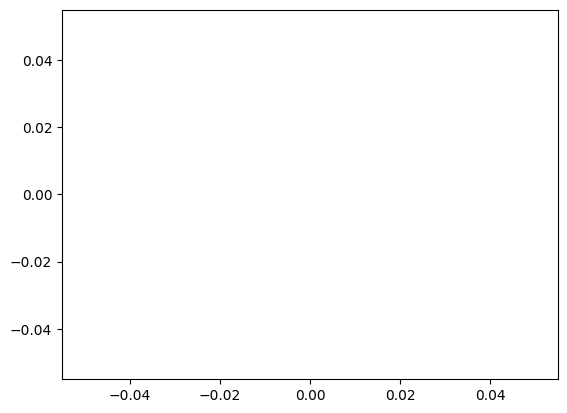

In [304]:
plt.plot(lri, lossi)

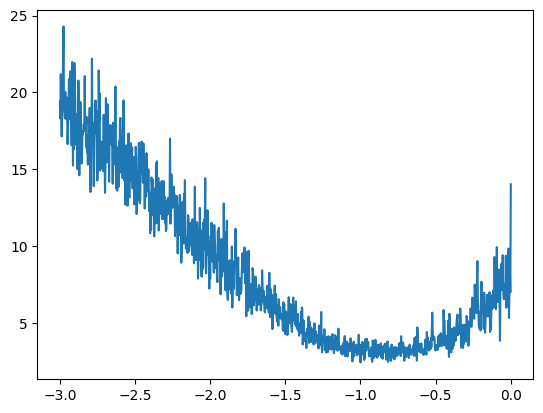

In [ ]:
plt.plot(lrei, lossi) # against the exponent of learning rate

In [305]:
emb = C[X1]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y1)
loss

tensor(2.5797, grad_fn=<NllLossBackward0>)

In [306]:
# For better modelling the splitting the data into different sets.
# traning spli, validation, & test set
# 80, 10, 10 --> ideally.


# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
######################### For training

In [307]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [308]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) # Increase the dimensions from 2 to 10
W1 = torch.randn((30, 200), generator=g) # Increase the size of nerons 100--> 300
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [309]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [310]:
for p in parameters:
  p.requires_grad = True

In [311]:
lri = []
lrei = []
lossi = []
stepi = []

In [312]:
for i in range(200000):

  # forward pass
  # Implelementing nminibatch
  ix = torch.randint(0, Xtr.shape[0], [32, ])
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  #counts = logits.exp()
  #prob = counts / counts.sum(1, keepdim=True)
  #loss = -prob[torch.arange(32), Y1].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # Track the data
  #lri.append(lr)
  #lrei.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.170497179031372


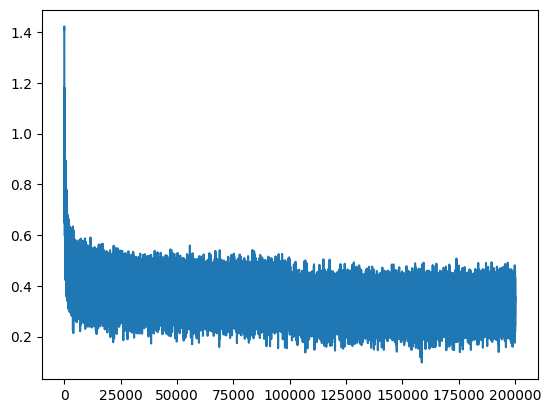

In [313]:
plt.plot(stepi, lossi)

In [314]:
# Loss on traing set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1432, grad_fn=<NllLossBackward0>)

In [315]:
# Loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1810, grad_fn=<NllLossBackward0>)

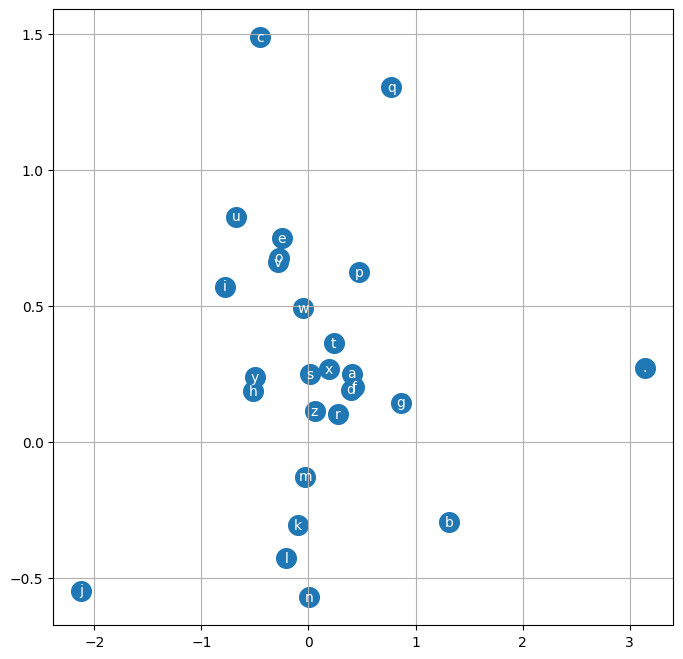

In [316]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [317]:

context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [318]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

carpah.
amelle.
khaimri.
reh.
cassanden.
jazhnen.
deliah.
jareei.
ner.
keah.
maiiv.
kaleigh.
ham.
joce.
quinn.
shois.
alian.
quin.
elo.
dearisi.


In [319]:
https://github.com/karpathy/nn-zero-to-hero

SyntaxError: invalid syntax (ipython-input-2845962065.py, line 1)